In [1]:
%load_ext autoreload
%autoreload 2

### Dataset

In [2]:
import gc

import numpy
import torch
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.ToImage(),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True)
])

train = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

((50000, 3, 32, 32), (10000, 3, 32, 32))

In [3]:
import gtda.images

inverter = gtda.images.Inverter()

train_images = inverter.fit_transform(train_images)
test_images = inverter.transform(test_images)

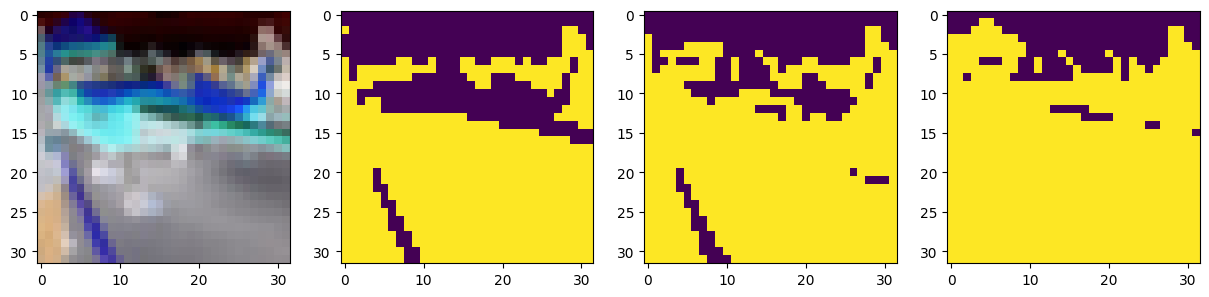

In [4]:
import matplotlib.pyplot as plt

def transform(data: numpy.ndarray):
    inv = gtda.images.Inverter()
    bin = gtda.images.Binarizer(threshold = 0.4)
    # return bin.fit_transform(data)
    return bin.fit_transform(data)

OBJECT = 5477

figure, axes = plt.subplots(1, 4, figsize = (15, 5))
axes[0].imshow(train_images[OBJECT, :, :, :].transpose((1, 2, 0)))
axes[1].imshow(transform(train_images[OBJECT, 0, :, :]))
axes[2].imshow(transform(train_images[OBJECT, 1, :, :]))
axes[3].imshow(transform(train_images[OBJECT, 2, :, :]))

### Features

In [5]:
import cvtda.pipelines

In [6]:
red_to_features = cvtda.pipelines.GreyscaleToFeatures(
    dump_directory = "1/red",
    with_pointclouds = False,
    binarizer_threshold = 0.4,
    radial_filtration_centers_x = [ 3, 8, 13, 18, 23, 28 ],
    radial_filtration_centers_y = [ 3, 8, 13, 18, 23, 28 ]
)
train_red_features = red_to_features.fit_transform(train_images[:, 0, :, :], "train")
test_red_features = red_to_features.transform(test_images[:, 0, :, :], "test")

train_red_features.shape, test_red_features.shape

> Filtrations
Fitting the binarizer


Fitting the filtrations: 100%|██████████| 49/49 [00:00<00:00, 3232.73it/s]


Fitting complete


Filtrations: 100%|██████████| 49/49 [01:12<00:00,  1.49s/it]


Fitting the persistence
Fitting complete
Got the result from 1/red/train\filtration_diagrams.npy
> Filtration diagrams shape: (2500000, 102, 3)
> Filtration features
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:29<00:00, 14.93s/it]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:52<00:00, 17.41s/it]


Fitting complete
Got the result from 1/red/train\filtration_features.npy
> Filtration features shape: (2500000, 260)
> Features shape: (50000, 13000)
> Filtrations


Filtrations: 100%|██████████| 49/49 [01:06<00:00,  1.35s/it]


Got the result from 1/red/train\filtration_diagrams.npy
> Filtration diagrams shape: (2500000, 102, 3)
> Filtration features
Got the result from 1/red/train\filtration_features.npy
> Filtration features shape: (2500000, 260)
> Features shape: (50000, 13000)
> Filtrations


Filtrations: 100%|██████████| 49/49 [00:13<00:00,  3.71it/s]


Got the result from 1/red/test\filtration_diagrams.npy
> Filtration diagrams shape: (500000, 178, 3)
> Filtration features
Got the result from 1/red/test\filtration_features.npy
> Filtration features shape: (500000, 260)
> Features shape: (10000, 13000)


((50000, 13000), (10000, 13000))

In [7]:
del red_to_features
gc.collect()

197

In [8]:
green_to_features = cvtda.pipelines.GreyscaleToFeatures(
    dump_directory = "1/green",
    with_pointclouds = False,
    binarizer_threshold = 0.4,
    radial_filtration_centers_x = [ 3, 8, 13, 18, 23, 28 ],
    radial_filtration_centers_y = [ 3, 8, 13, 18, 23, 28 ]
)
train_green_features = green_to_features.fit_transform(train_images[:, 1, :, :], "train")
test_green_features = green_to_features.transform(test_images[:, 1, :, :], "test")

train_green_features.shape, test_green_features.shape

> Filtrations
Fitting the binarizer


Fitting the filtrations: 100%|██████████| 49/49 [00:00<00:00, 2436.79it/s]


Fitting complete


Filtrations: 100%|██████████| 49/49 [01:15<00:00,  1.53s/it]


MemoryError: Unable to allocate 19.1 GiB for an array with shape (50000, 50, 32, 32) and data type float64

In [8]:
del green_to_features
gc.collect()

139

In [4]:
blue_to_features = cvtda.pipelines.GreyscaleToFeatures(
    dump_directory = "1/blue",
    with_pointclouds = False,
    binarizer_threshold = 0.4,
    radial_filtration_centers_x = [ 3, 8, 13, 18, 23, 28 ],
    radial_filtration_centers_y = [ 3, 8, 13, 18, 23, 28 ]
)
train_blue_features = blue_to_features.fit_transform(train_images[:, 2, :, :], "train")
test_blue_features = blue_to_features.transform(test_images[:, 2, :, :], "test")

train_blue_features.shape, test_blue_features.shape

> Filtrations
Fitting the binarizer


Fitting the filtrations: 100%|██████████| 49/49 [00:00<00:00, 2977.79it/s]


Fitting complete


Filtrations: 100%|██████████| 49/49 [01:11<00:00,  1.46s/it]


Fitting the persistence
Fitting complete
Got the result from 1/blue/train\filtration_diagrams.npy
> Filtration diagrams shape: (2500000, 110, 3)
> Filtration features
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:32<00:00, 16.48s/it]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:56<00:00, 18.69s/it]


Fitting complete
Got the result from 1/blue/train\filtration_features.npy
> Filtration features shape: (2500000, 260)
> Features shape: (50000, 13000)
> Filtrations


Filtrations: 100%|██████████| 49/49 [01:10<00:00,  1.43s/it]


Got the result from 1/blue/train\filtration_diagrams.npy
> Filtration diagrams shape: (2500000, 110, 3)
> Filtration features
Got the result from 1/blue/train\filtration_features.npy
> Filtration features shape: (2500000, 260)
> Features shape: (50000, 13000)
> Filtrations


Filtrations: 100%|██████████| 49/49 [00:13<00:00,  3.75it/s]


Calculating the persistence
Saving the result to 1/blue/test\filtration_diagrams.npy
> Filtration diagrams shape: (500000, 107, 3)
> Filtration features


Batch:   0%|          | 0/123 [00:00<?, ?it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Batch: 100%|██████████| 123/123 [01:45<00:00,  1.17it/s]


Saving the result to 1/blue/test\filtration_features.npy
> Filtration features shape: (500000, 260)
> Features shape: (10000, 13000)


((50000, 13000), (10000, 13000))

In [10]:
del blue_to_features
gc.collect()

139

### Analyze features

In [3]:
train_features = numpy.minimum(
    numpy.hstack([
        numpy.load("1/red/train/filtration_features.npy").reshape((len(train_images), -1)),
        numpy.load("1/green/train/filtration_features.npy").reshape((len(train_images), -1)),
        numpy.load("1/blue/train/filtration_features.npy").reshape((len(train_images), -1)),
    ]),
    600000
)
train_features.shape

(50000, 39000)

In [4]:
test_features = numpy.minimum(
    numpy.hstack([
        numpy.load("1/red/test/filtration_features.npy").reshape((len(test_images), -1)),
        numpy.load("1/green/test/filtration_features.npy").reshape((len(test_images), -1)),
        numpy.load("1/blue/test/filtration_features.npy").reshape((len(test_images), -1)),
    ]),
    600000
)
test_features.shape

(10000, 39000)

In [5]:
import tqdm

ok_features = []
for idx in tqdm.trange(train_features.shape[1]):
    if numpy.std(train_features[:, idx]) > 1e-6:
        ok_features.append(idx)

train_features = train_features[:, ok_features]
test_features = test_features[:, ok_features]

100%|██████████| 39000/39000 [00:43<00:00, 904.98it/s] 


In [7]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

100%|██████████| 17520/17520 [01:47<00:00, 163.57it/s, partition_by=20483, num_features=2, duplicates=9152]  


Found 9153 duplicates


((50000, 24084), (10000, 24084))

In [8]:
numpy.save("1/inv_train_features.npy", train_features)
numpy.save("1/inv_test_features.npy", test_features)

In [3]:
train_features = numpy.load("1/raw_train_features.npy")
test_features = numpy.load("1/raw_test_features.npy")

In [4]:
import tqdm

ok_features = []
for idx in tqdm.trange(train_features.shape[1]):
    if numpy.std(train_features[:, idx]) > 1e-6:
        ok_features.append(idx)

train_features = train_features[:, ok_features]
test_features = test_features[:, ok_features]

100%|██████████| 39000/39000 [00:36<00:00, 1077.63it/s]


In [6]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

100%|██████████| 18117/18117 [01:36<00:00, 187.70it/s, partition_by=34976, num_features=2, duplicates=9113]  


Found 9114 duplicates


((50000, 24025), (10000, 24025))

In [7]:
numpy.save("1/raw_train_features.npy", train_features)
numpy.save("1/raw_test_features.npy", test_features)

In [3]:
train_features = numpy.minimum(
    numpy.hstack([
        numpy.load("1/raw_train_features.npy"),
        numpy.load("1/inv_train_features.npy")
    ]),
    600000
)
train_features.shape

(50000, 48109)

In [4]:
test_features = numpy.minimum(
    numpy.hstack([
        numpy.load("1/raw_test_features.npy"),
        numpy.load("1/inv_test_features.npy")
    ]),
    600000
)
test_features.shape

(10000, 48109)

In [5]:
import tqdm

ok_features = []
for idx in tqdm.trange(train_features.shape[1]):
    if numpy.std(train_features[:, idx]) > 1e-6:
        ok_features.append(idx)

train_features = train_features[:, ok_features]
test_features = test_features[:, ok_features]

100%|██████████| 48109/48109 [00:19<00:00, 2478.03it/s]


In [7]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

100%|██████████| 28215/28215 [03:00<00:00, 156.52it/s, partition_by=40278, num_features=2, duplicates=7984]  


Found 7985 duplicates


((50000, 40124), (10000, 40124))

In [3]:
numpy.save("1/train_features.npy", train_features)
numpy.save("1/test_features.npy", test_features)

NameError: name 'train_features' is not defined

### StandardScaler

In [4]:
import cvtda.classification

In [5]:
train_features = numpy.load("1/train_features.npy")
test_features = numpy.load("1/test_features.npy")

train_features.shape, test_features.shape

((50000, 40124), (10000, 40124))

In [6]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((50000, 40124), (10000, 40124))

### InformationValueFeatureSelector

Fitting the information value feature selector


information values: 100%|██████████| 40124/40124 [06:49<00:00, 97.88it/s] 


Fitting complete


((50000, 19366), (10000, 19366))

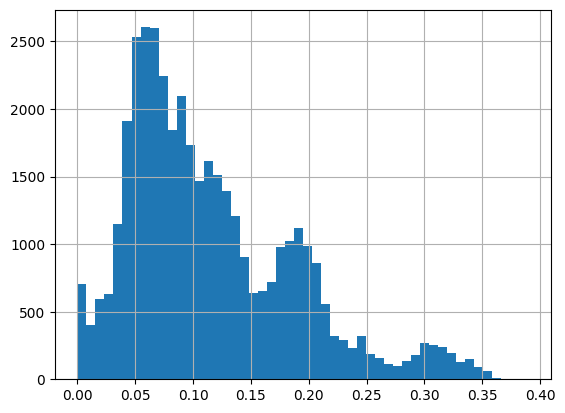

In [7]:
import cvtda.classification

feature_selector = cvtda.classification.InformationValueFeatureSelector(threshold = 0.1, bins = 50)

train_features = feature_selector.fit_transform(train_features, train_labels)
test_features = feature_selector.transform(test_features)

feature_selector.hist()

train_features.shape, test_features.shape

Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4284, 'TOP-2 Accuracy': 0.6256, 'TOP-3 Accuracy': 0.7385, 'TOP-4 Accuracy': 0.8182, 'TOP-5 Accuracy': 0.871, 'TOP-6 Accuracy': 0.916, 'TOP-7 Accuracy': 0.9509, 'TOP-8 Accuracy': 0.9743, 'TOP-9 Accuracy': 0.9902, 'AUC-ROC': 0.8365055555555554, 'Precision': 0.42130168870344586, 'Recall': 0.4284, 'F1-score': 0.42090849734600333}
Fitting <catboost.core.CatBoostClassifier object at 0x000001B1E0643CA0>
Learning rate set to 0.309284
0:	learn: 2.1856022	total: 687ms	remaining: 4m 34s
1:	learn: 2.1114553	total: 1.25s	remaining: 4m 9s
2:	learn: 2.0580584	total: 1.73s	remaining: 3m 49s
3:	learn: 2.0171247	total: 2.21s	remaining: 3m 39s
4:	learn: 1.9840194	total: 2.72s	remaining: 3m 34s
5:	learn: 1.9555150	total: 3.3s	remaining: 3m 36s
6:	learn: 1.9287944	total: 3.87s	remaining: 3m 37s
7:	learn: 1.9100331	t

KeyboardInterrupt: 

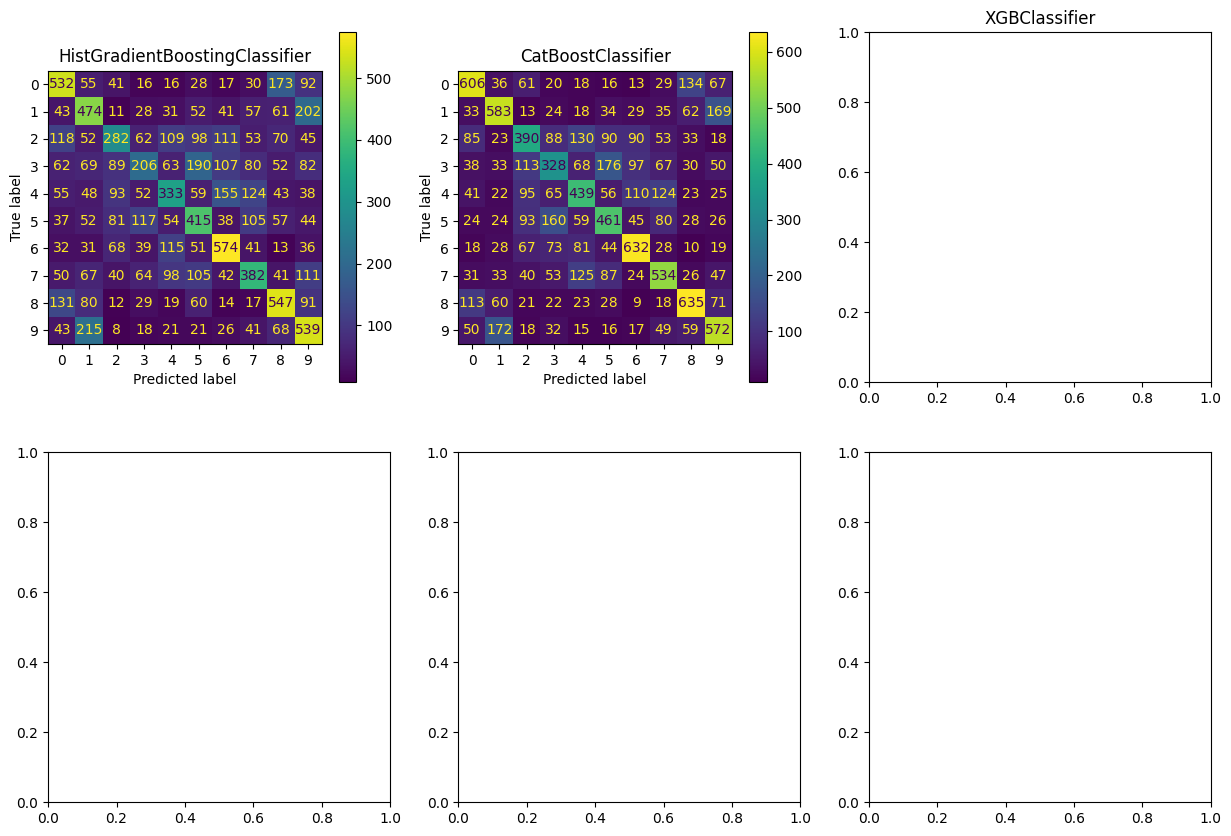

In [8]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### CorrelationSelector

Fitting the correlations feature selector
Fitting complete


((50000, 15039), (10000, 15039))

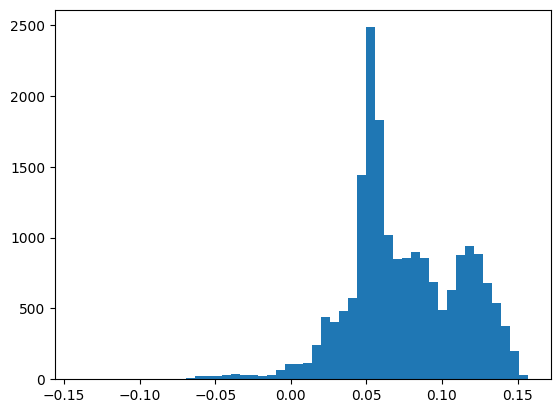

In [9]:
correlation_selector = cvtda.classification.CorrelationSelector(threshold = 0.05)

train_features = correlation_selector.fit_transform(train_features, train_labels)
test_features = correlation_selector.transform(test_features)

correlation_selector.hist()

train_features.shape, test_features.shape

In [10]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3255, 'TOP-2 Accuracy': 0.521, 'TOP-3 Accuracy': 0.6377, 'TOP-4 Accuracy': 0.734, 'TOP-5 Accuracy': 0.8017, 'TOP-6 Accuracy': 0.8629, 'TOP-7 Accuracy': 0.909, 'TOP-8 Accuracy': 0.9478, 'TOP-9 Accuracy': 0.9783, 'AUC-ROC': 0.7685911222222221, 'Precision': 0.3320934610813535, 'Recall': 0.3255, 'F1-score': 0.31498313953472756}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3938, 'TOP-2 Accuracy': 0.5796, 'TOP-3 Accuracy': 0.6913, 'TOP-4 Accuracy': 0.7724, 'TOP-5 Accuracy': 0.8364, 'TOP-6 Accuracy': 0.8888, 'TOP-7 Accuracy': 0.9293, 'TOP-8 Accuracy': 0.9599, 'TOP-9 Accuracy': 0.9831, 'AUC-ROC': 0.8049802999999999, 'Precision': 0.3868726227847959, 'Recall': 0.39380000000000004, 'F1-score': 0.3875117192165682}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001B2F2D799C0>
Input to LazyLinear: 15

100%|██████████| 25/25 [04:39<00:00, 11.17s/it, loss=9.84e+4, val_acc=0.494]


{'classifier': 'NNClassifier', 'Accuracy': 0.4942, 'TOP-2 Accuracy': 0.6902, 'TOP-3 Accuracy': 0.7932, 'TOP-4 Accuracy': 0.8551, 'TOP-5 Accuracy': 0.899, 'TOP-6 Accuracy': 0.9318, 'TOP-7 Accuracy': 0.96, 'TOP-8 Accuracy': 0.9772, 'TOP-9 Accuracy': 0.9901, 'AUC-ROC': 0.8567854333333332, 'Precision': 0.4872405889268444, 'Recall': 0.49420000000000003, 'F1-score': 0.48791808931840575}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4107, 'TOP-2 Accuracy': 0.6138, 'TOP-3 Accuracy': 0.7272, 'TOP-4 Accuracy': 0.8062, 'TOP-5 Accuracy': 0.8657, 'TOP-6 Accuracy': 0.908, 'TOP-7 Accuracy': 0.9445, 'TOP-8 Accuracy': 0.9727, 'TOP-9 Accuracy': 0.99, 'AUC-ROC': 0.8289822111111111, 'Precision': 0.4038980974749557, 'Recall': 0.4107, 'F1-score': 0.40421469411914}
Fitting <catboost.core.CatBoostClassifier object at 0x000001B2F2D7B490>


Learning rate set to 0.309284


: 

### PCA

In [12]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components = 64, random_state = 42)

train_features = pca.fit_transform(train_features)
print('Explained variance', round(pca.explained_variance_ratio_.sum(), 2))
print([ round(x, 3) for x in pca.explained_variance_ratio_ ])

test_features = pca.transform(test_features)

train_features.shape, test_features.shape

Explained variance 0.91
[0.456, 0.128, 0.056, 0.055, 0.038, 0.021, 0.015, 0.014, 0.013, 0.009, 0.009, 0.007, 0.006, 0.006, 0.005, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


((50000, 64), (10000, 64))

In [ ]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)